In [19]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np

from datetime import datetime
from dateutil.parser import parse

import matplotlib.pyplot as plt

import pandas.plotting._converter as pandacnv
%matplotlib notebook


In [2]:
DATA_DIR = "/home/ubuntu/unearthed_water/"


In [3]:
train = pd.read_csv(DATA_DIR+"train.csv")
print (type(train), train.shape)

<class 'pandas.core.frame.DataFrame'> (570300, 29)


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_colnames = list(train)
train_colnames

['timestamp',
 'WQI8100XCL1.CPV',
 'XI84201.PV',
 'XI84202.PV',
 'XI84123.PV',
 'XI84124.PV',
 'XI84125.PV',
 'FX87211.CPV1',
 'FIC87211.PV',
 'FIC87211.SV',
 'FX87211.P01',
 'FI87208.PV',
 'AIC88049.PV',
 'ZI88001.PV',
 'NIC88002.PV',
 'PIC88007.PV',
 'LIC88006.PV',
 'AIC88055.PV',
 'FIC88022.PV',
 'DIC88023.PV',
 'II88151.PV',
 'II88152.PV',
 'SI88033.PV',
 'SI88034.PV',
 'MQI88024.CPV',
 'FV88156.PV',
 'FV88043.PV',
 'FV88044.PV',
 'target']

In [5]:
bad_list = ['No Data', 'I/O Timeout', 'Bad Input', 'Scan Off']

In [6]:
print (train.shape)
cols_to_delete = []
for colname in train_colnames:
    try:
        badcount = []
        for bad in bad_list:
            badcount.append(train[colname].str.contains(bad).sum())
        print (colname, "\t", dict(zip(bad_list, badcount))  , train[colname].dtype)
        if badcount[0] == train.shape[0]:
            cols_to_delete.append(colname)
        """
        try:
            if colname != 'timestamp':
                print ("downcasting: ", colname, ", dtype:", train[colname].dtype)
                train[colname] = pd.to_numeric(train[colname])#this is failing
                print ("column downcast: ", train[colname].dtype)
        except Exception as e: 
            print("error downcasting", e) 
        """
    except Exception as e: 
        print(e)
        print ("error", colname)
        #added this since reusing this code block for data exploration
print ("cols_to_delete:", cols_to_delete)
#cols_to_delete: ['II88151.PV', 'II88152.PV', 'FV88156.PV', 'FV88043.PV', 'FV88044.PV']

(570300, 29)
timestamp 	 {'I/O Timeout': 0, 'Scan Off': 0, 'No Data': 0, 'Bad Input': 0} object
WQI8100XCL1.CPV 	 {'I/O Timeout': 8, 'Scan Off': 0, 'No Data': 0, 'Bad Input': 2705} object
XI84201.PV 	 {'I/O Timeout': 0, 'Scan Off': 0, 'No Data': 0, 'Bad Input': 1307} object
XI84202.PV 	 {'I/O Timeout': 0, 'Scan Off': 0, 'No Data': 0, 'Bad Input': 1307} object
XI84123.PV 	 {'I/O Timeout': 0, 'Scan Off': 0, 'No Data': 0, 'Bad Input': 1308} object
XI84124.PV 	 {'I/O Timeout': 0, 'Scan Off': 0, 'No Data': 0, 'Bad Input': 1312} object
XI84125.PV 	 {'I/O Timeout': 0, 'Scan Off': 0, 'No Data': 0, 'Bad Input': 1316} object
FX87211.CPV1 	 {'I/O Timeout': 0, 'Scan Off': 125, 'No Data': 0, 'Bad Input': 1307} object
FIC87211.PV 	 {'I/O Timeout': 0, 'Scan Off': 0, 'No Data': 0, 'Bad Input': 1307} object
FIC87211.SV 	 {'I/O Timeout': 0, 'Scan Off': 0, 'No Data': 0, 'Bad Input': 1307} object
FX87211.P01 	 {'I/O Timeout': 0, 'Scan Off': 125, 'No Data': 0, 'Bad Input': 1307} object
FI87208.PV 	 {'I/O T

In [7]:
print (train.shape)
train = train.drop(cols_to_delete, axis=1)
print (train.shape)

(570300, 29)
(570300, 24)


In [8]:
print (train.shape)
cols_to_delete = []
for colname in train_colnames[1:len(train_colnames)]:
    print ("colname:", colname)
    for bad in bad_list:
        print ("bad:", bad)
        #find max consecutive number of bad values. need to know how this will affect handling bad data.
        consec_count_list = []
        max_consec = 0
        bad_count = 0
        for i in range(1,train.shape[0]-1):
            if train[colname].iloc[i]==bad and train[colname].iloc[i-1]==bad:
                #print (bad, i, bad_count)
                bad_count += 1
            elif bad_count > max_consec:
                max_consec = bad_count
                bad_count = 0
                print ("max_consec of consecutive instances of ", bad, ":", max_consec)
            if train[colname].iloc[i]!=bad and train[colname].iloc[i-1]==bad:
                #end of bad text run
                if bad_count>0:
                    consec_count_list.append(bad_count)
        print (bad, "consec_count_list:", consec_count_list)

(570300, 24)
colname: WQI8100XCL1.CPV
bad: No Data
No Data consec_count_list: []
bad: I/O Timeout
max_consec of consecutive instances of  I/O Timeout : 3
I/O Timeout consec_count_list: [3]
bad: Bad Input
max_consec of consecutive instances of  Bad Input : 920
max_consec of consecutive instances of  Bad Input : 1783
Bad Input consec_count_list: []
bad: Scan Off
Scan Off consec_count_list: []
colname: XI84201.PV
bad: No Data
No Data consec_count_list: []
bad: I/O Timeout
I/O Timeout consec_count_list: []
bad: Bad Input
max_consec of consecutive instances of  Bad Input : 1291
Bad Input consec_count_list: [14]
bad: Scan Off
Scan Off consec_count_list: []
colname: XI84202.PV
bad: No Data
No Data consec_count_list: []
bad: I/O Timeout
I/O Timeout consec_count_list: []
bad: Bad Input
max_consec of consecutive instances of  Bad Input : 1291
Bad Input consec_count_list: [14]
bad: Scan Off


KeyboardInterrupt: 

In [10]:
print (train['timestamp'].shape[0])
train_timestamp = []
for i in range(0, train['timestamp'].shape[0]):
    train_timestamp.append(datetime.strptime(train['timestamp'][i], '%Y-%m-%d %H:%M:%S'))

#https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

570300


In [17]:
#print (train_timestamp[train['timestamp'].shape[0]-1], train['timestamp'][train['timestamp'].shape[0]-1])


In [13]:
train_target = pd.to_numeric(train['target'], errors='coerce', downcast=None)

570300 570300


<IPython.core.display.Javascript object>


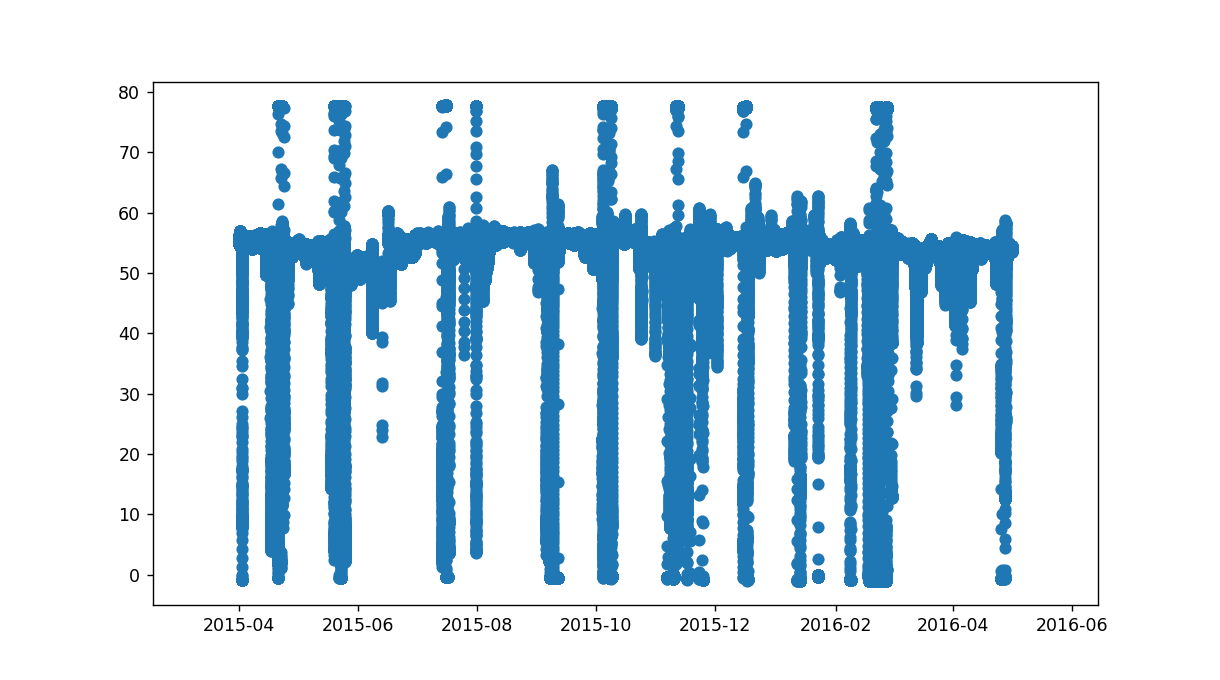

In [30]:
pandacnv.register()
%matplotlib notebook
print (len(train_timestamp), len(train_target))
plt.scatter(train_timestamp, train_target)
plt.show()

In [22]:
#take average of values over time period X.
def smoothing(input_col, input_timestamp, smooth_period):
    output = []
    timestamp_output = []
    for i in range(0, input_col.shape[0], smooth_period):
        output.append(train_target[i:i+smooth_period].mean())
        timestamp_output.append(input_timestamp[i])
        #print (i)
    return output, timestamp_output

In [23]:
train_target_smoothed, train_timestamp_smoothed = smoothing(train_target, train_timestamp, 5)

114060 114060


<IPython.core.display.Javascript object>


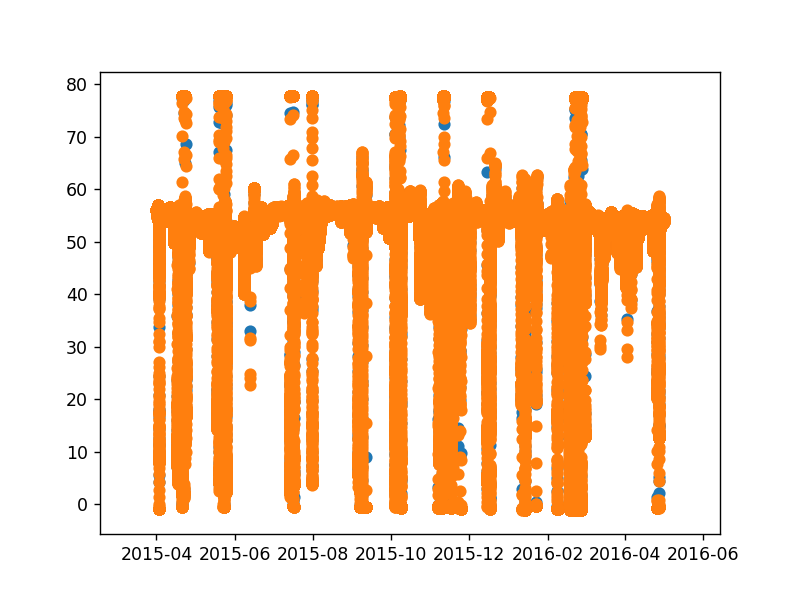

In [28]:
print (len(train_timestamp_smoothed), len(train_target_smoothed))
pandacnv.register()
%matplotlib notebook
plt.scatter(train_timestamp_smoothed, train_target_smoothed)
plt.show()